In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,normalize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [3]:
data_train =  pd. read_csv('SalaryData_train(1).csv')

In [4]:
str_column=['workclass','education','maritalstatus','occupation','race','sex','relationship','native','Salary']
for i in str_column:
    label_encoder=preprocessing.LabelEncoder()
    data_train[i]=label_encoder.fit_transform(data_train[i])

In [5]:
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [6]:
data_test = pd.read_csv("SalaryData_test(1).csv")

In [7]:
str_column=['workclass','education','maritalstatus','occupation','race','sex','relationship','native','Salary']
for i in str_column:
    label_encoder=preprocessing.LabelEncoder()
    data_test[i]=label_encoder.fit_transform(data_test[i])

In [8]:
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [9]:
X = data_train.drop('Salary',axis=1)
y = data_train['Salary']
X_norm = normalize(X)

In [10]:
model = MB()
param_grid = {'alpha':range(1,11)}
results = GridSearchCV(model,param_grid,cv=10)
results.fit(X_norm, y)


GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': range(1, 11)})

In [11]:
results.best_params_,results.best_score_

({'alpha': 1}, 0.7742780521342806)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

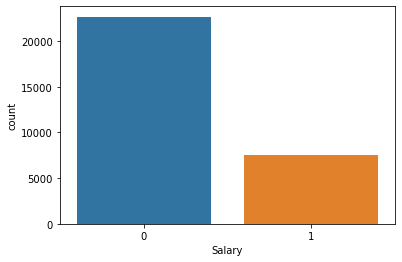

In [12]:
sns.countplot(y)

In [13]:
resample = SMOTE(random_state=42)
X_res, y_res =resample.fit_resample(X_norm,y)
X_res.shape , y_res.shape

((45306, 13), (45306,))

In [14]:
model = MB(alpha=8)
model.fit(X_res , y_res)

MultinomialNB(alpha=8)

In [15]:
X_test = data_test.drop('Salary',axis=1)
y_test = data_test['Salary']
X_test_norm = normalize(X_test)

In [16]:
pred = model.predict(X_test_norm)
np.mean(y_test == pred)

0.7753652058432935

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     11360
           1       0.58      0.31      0.40      3700

    accuracy                           0.78     15060
   macro avg       0.69      0.62      0.63     15060
weighted avg       0.75      0.78      0.75     15060



In [18]:
confusion_matrix(y_test,pred)

array([[10536,   824],
       [ 2559,  1141]], dtype=int64)

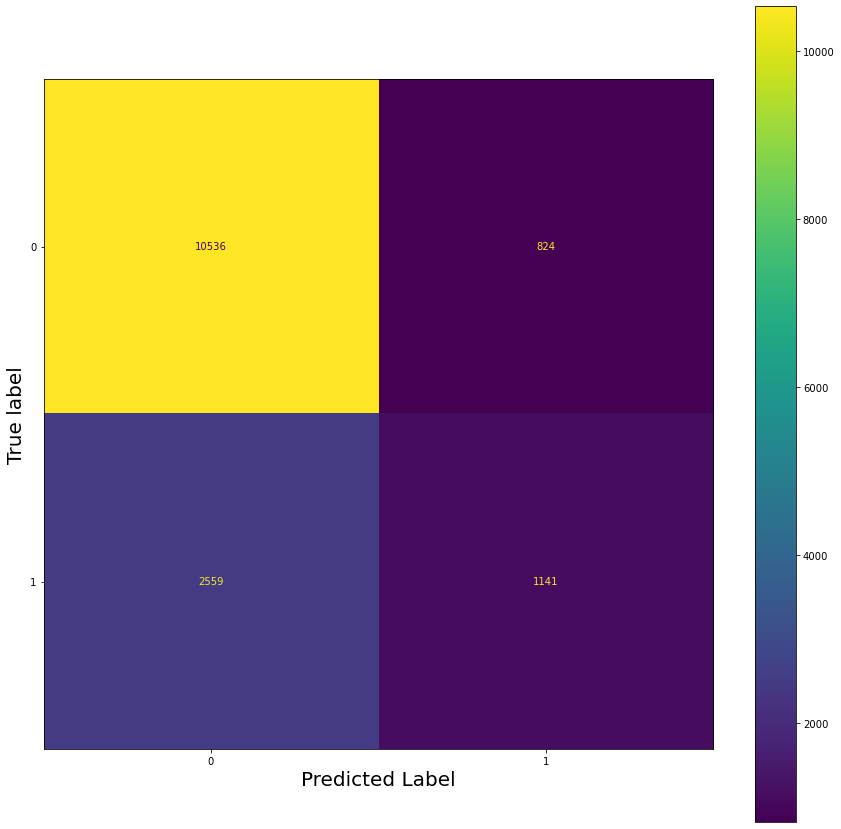

In [19]:
fig , ax =plt.subplots(figsize=(15,15))
plot_confusion_matrix(model,X_test_norm,y_test, ax=ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True label',fontsize = 20)
plt.show()